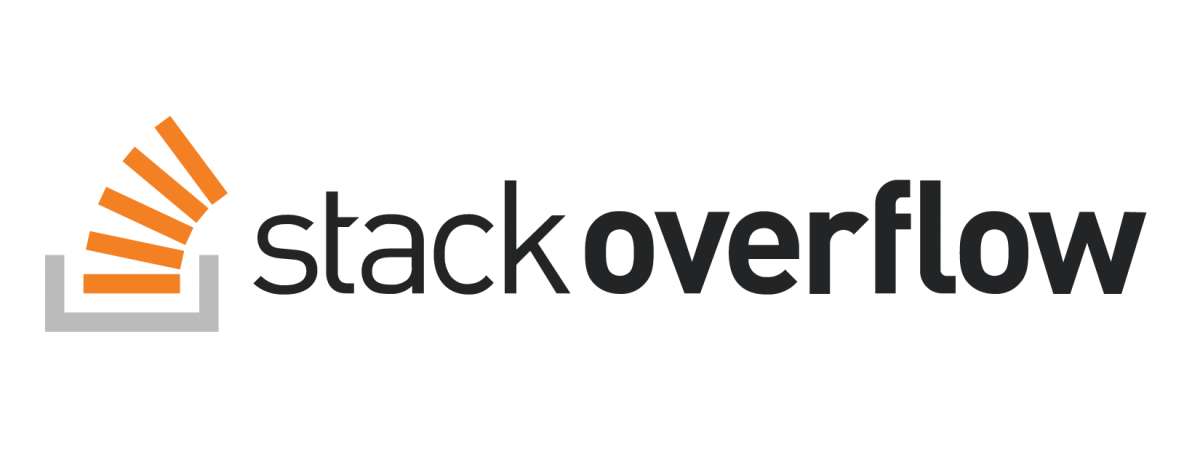

pic credit - google images

**This Dataset contain 60,000 Stack Overflow questions from 2016-2020 and classified them into three categories**

* HQ: High-quality posts with 30+ score and without a single edit.

* LQ_EDIT: Low-quality posts with a negative score and with multiple community edits. However, they still remain open after the edits.

* LQ_CLOSE: Low-quality posts that were closed by the community without a single edit.

# What we will cover in this Notebook

> Cleaning and formatting dataset

> Visualizing dataset and find some usefull insight out of it

> Carving text for Neural Network Classification

> Performing Keras LSTM for 
  * Multi-Class text Classification
  * Multi-Label text Classification

**First Import some basice Libraries**

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsp
import datetime as dt
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 

import warnings
warnings.filterwarnings('ignore')

import re


%matplotlib inline

**Reading Dataset and Previewing First 10 Values**

In [2]:
data = pd.read_csv("../input/60k-stack-overflow-questions-with-quality-rate/data.csv")
data.head(10)

Id                                              Title  \
0  34552656             Java: Repeat Task Every Random Seconds   
1  34552974  How to get all the child records from differen...   
2  34553034                  Why are Java Optionals immutable?   
3  34553174  Text Overlay Image with Darkened Opacity React...   
4  34553318         Why ternary operator in swift is so picky?   
5  34553755                 hide/show fab with scale animation   
6  34554026  Accessing pointer member of the structure usin...   
7  34554206  How To Disable 2nd Saturday 4th Saturday ,Sund...   
8  34554671                   Resizing containers in bootstrap   
9  34554721  Retrieve all except some data of the another t...   

                                                Body  \
0  <p>I'm already familiar with repeating tasks e...   
1  I am having 4 different tables like \r\nselect...   
2  <p>I'd like to understand why Java 8 Optionals...   
3  <p>I am attempting to overlay a title over an ...   
4  <p>The question is very simple, but I just cou...   
5  <p>I'm using custom floatingactionmenu. I need...   
6  <p>I have defined integer pointer inside the s...   
7    i want to Disable 2nd Saturday 4th saturday,...   
8  I am new to bootstrap and i would like to find...   
9  I have two table m_master and tbl_appointment\...   

                                                Tags         CreationDate  \
0                                     <java><repeat>  2016-01-01 00:21:59   
1                                  <sql><sql-server>  2016-01-01 01:44:52   
2                                   <java><optional>  2016-01-01 02:03:20   
3  <javascript><image><overlay><react-native><opa...  2016-01-01 02:48:24   
4  <swift><operators><whitespace><ternary-operato...  2016-01-01 03:30:17   
5  <android><material-design><floating-action-but...  2016-01-01 05:21:48   
6                     <c><pointers><data-structures>  2016-01-01 06:21:17   
7                    <javascript><jquery><jquery-ui>  2016-01-01 06:55:18   
8             <jquery><html><css><twitter-bootstrap>  2016-01-01 08:32:05   
9             <php><mysql><sql><codeigniter><mysqli>  2016-01-01 08:43:50   

          Y  
0  LQ_CLOSE  
1   LQ_EDIT  
2        HQ  
3        HQ  
4        HQ  
5        HQ  
6  LQ_CLOSE  
7   LQ_EDIT  
8   LQ_EDIT  
9   LQ_EDIT

**Checking some basic information about dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [4]:
data.shape

(60000, 6)

In [5]:
data.describe(include='object').transpose()

count unique                                                top  \
Title         60000  59995                                 Regular Expression   
Body          60000  60000  i'm creating a webpage. the webpage has a form...   
Tags          60000  33224                                           <python>   
CreationDate  60000  59981                                2016-02-02 17:08:27   
Y             60000      3                                           LQ_CLOSE   

               freq  
Title             3  
Body              1  
Tags           1068  
CreationDate      2  
Y             20000

# Cleaning and Preprocessing Dataset

We can see that Body and Tags Columns are in HTML Tag, so we will basicly extract only text from HTML Tag

In [6]:
data['Body'][0]

'<p>I\'m already familiar with repeating tasks every n seconds by using Java.util.Timer and Java.util.TimerTask. But lets say I want to print "Hello World" to the console every random seconds from 1-5. Unfortunately I\'m in a bit of a rush and don\'t have any code to show so far. Any help would be apriciated.  </p>\n'

In [7]:
data['Tags'][10]

'<c#><windows-10><windows-10-mobile><windows-10-universal>'

In [8]:
data['CleanBody'] = data['Body'].apply(lambda x:bsp(x,'html.parser').text.replace('\\','').replace('\n','').replace('\t','').replace('\r',''))
data['Tags'] = data['Tags'].apply(lambda x:x.replace('<','').replace('>',' '))

**Converting CreationDate Column Value datatype from object to pandas Datetime**

In [9]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'],errors='coerce')

data['CreationMonth'] = data['CreationDate'].dt.month
data['CreationDay'] = data['CreationDate'].dt.day
data['CreationYear'] = data['CreationDate'].dt.year
data['CreationQuater'] = data['CreationDate'].dt.quarter
data['CreationDate'] = data['CreationDate'].dt.date

# Visualization

Checking Frequency of Question's Quality year by year

In [10]:
fig = px.histogram(data,x='CreationDate',title='Question\'s Quality year by year',color='Y')

fig.update_layout(height = 700)
fig.update_xaxes(categoryorder='category descending',title='Date').update_yaxes(title='Number of Questions')

fig.show()

Below Graph show Amount of Questions asked year by year

In [11]:
fig = px.histogram(data,x='CreationDate',title='Number of Question year by year')

fig.update_layout(height = 700)
fig.update_xaxes(categoryorder='category descending',title='Date').update_yaxes(title='Number of Questions')

fig.show()

Below Bar Chart show Frequency of Question's Quality year by year 

In [12]:
fig = px.histogram(data,x='CreationDate',title='Question\'s Quality year by year',color='Y',nbins=6,barmode = 'group')

fig.update_layout(height = 700)
fig.update_xaxes(categoryorder='category descending',title='Date').update_yaxes(title='Number of Questions')

fig.show()

In [13]:
allTags = data['Tags'].apply(lambda x: x.lower())
allTags = allTags.values
allTags = list(allTags)
allTags = ''.join(allTags)
count = Counter(allTags.split())


count = pd.DataFrame(list(dict(count).items()),columns = ['Technology','Count'])
count.astype({'Count':'int64'})

count.sort_values('Count',axis =0,ascending = False,inplace = True)

Checking Tags Frequency 

In which Basically we are finding out Top 20 Programming Language or Technology types of Question were asked

In [14]:
fig = px.scatter(count[:20], x = 'Technology',y='Count',size='Count',color='Count')

fig.update_layout(title='Top 20 Technologies',xaxis=dict(title='Technology'),yaxis=dict(title='No. of Questions'))

fig.show()

Now let's find out Question's Length Range and Frequency (Question's Title)

In [15]:
title = data['Title'].apply(lambda x:len(x.split()))

fig = px.histogram(x=title.values,title='Length Distribution of  Question')


fig.update_xaxes(title='Length Of Question').update_yaxes(title='No. Of Question')
fig.show()

Now let's find out Question's Length Range and Frequency (Question's Body)

In [16]:
cleanBd = data['CleanBody'].apply(lambda x:len(x.split()))

fig = px.histogram(x=cleanBd.values,title = 'Length Distribution of Clean Body')

fig.show()

Now let's see how many tags are use in Quesitons

In [17]:
tags = data['Tags'].apply(lambda x:len(x.split()))

fig = px.histogram(x= tags.values,title= ' Length Distribution of Tags')
fig.show()

In [18]:
# Word Cloud with Stop words
stopwords = set(STOPWORDS) 
def WordCloudSW(values):
    wordcloud = WordCloud(width = 500, height = 300, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(values) 
    
    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title("Without Stop Words")
    plt.imshow(wordcloud)
    plt.show()

In [19]:
# Word Cloud without Stop words

def word_cloud(values):
    wordcloud = WordCloud(width = 500, height = 300, 
                background_color ='white', 
                min_font_size = 10).generate(values) 
    
    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title("With Stop Words")
    plt.imshow(wordcloud)
    plt.show()

* We have saw that most frequently asked question are of JavaScript Tag
* So lets find which are most occuring word in JavaScript technology


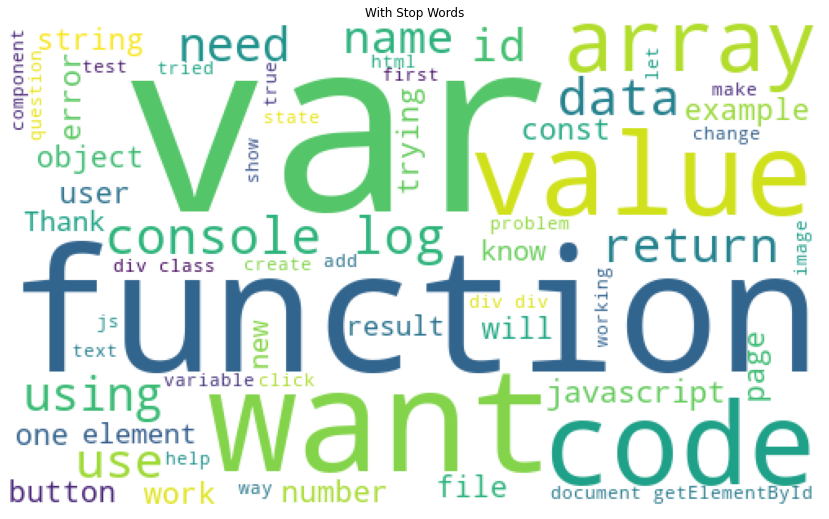

In [20]:

js = data[data['Tags'].str.contains('javascript')]['CleanBody'].values

js = ' '.join(list(js))
word_cloud(js)# with stop words

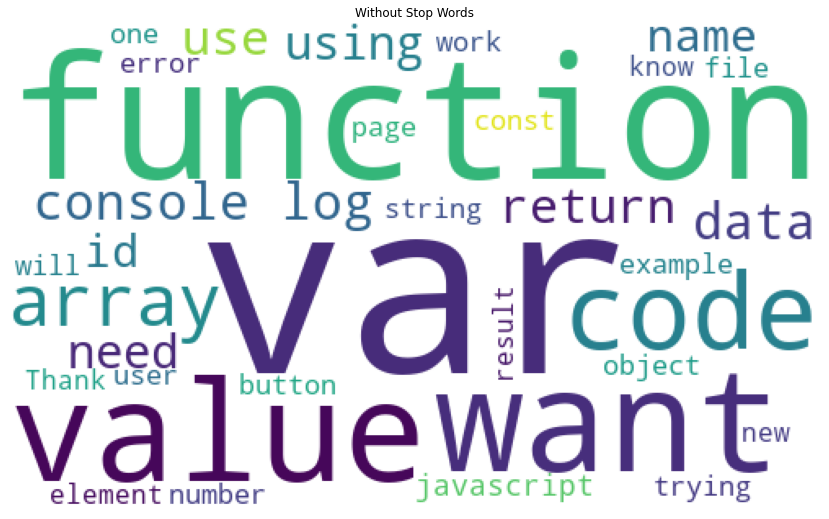

In [21]:
WordCloudSW(js)# without stop words

Now lets see for the Python 

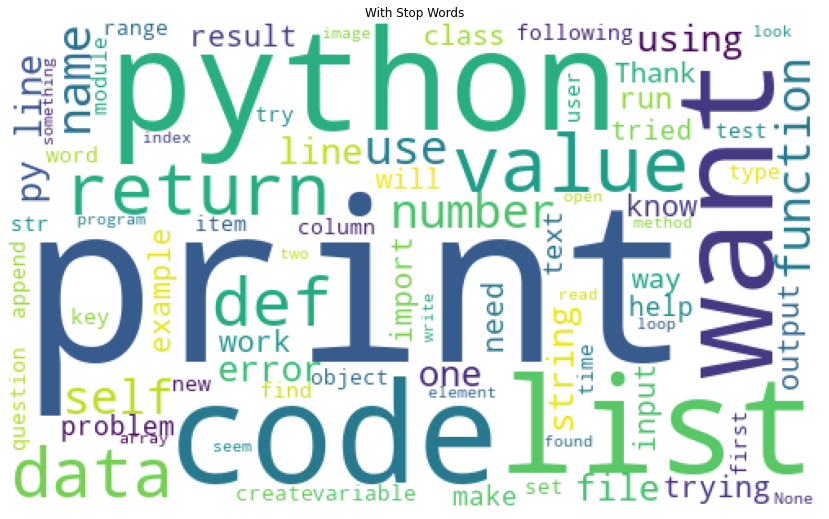

In [22]:
python = data[data['Tags'].str.contains('python')]['CleanBody']
python = ''.join(list(python.values))
word_cloud(python)

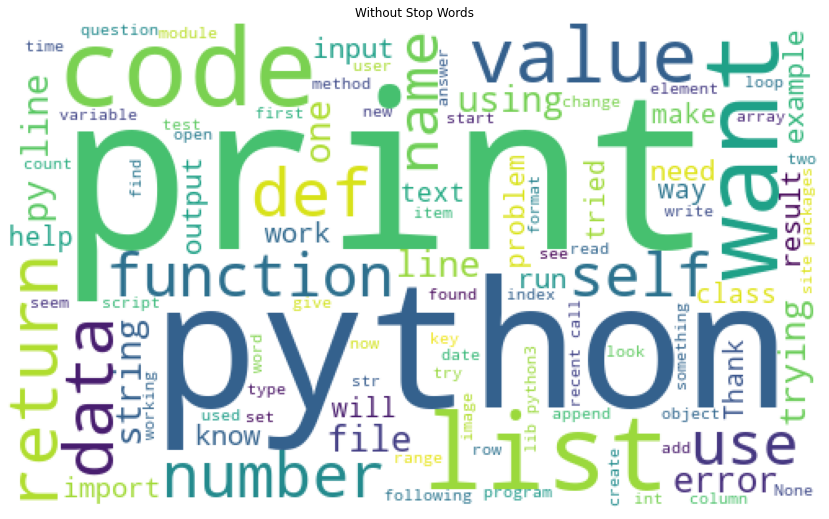

In [23]:
WordCloudSW(python)# without stop words

In [24]:
# Unigrams before removing the stopwords
def getTopNWords(corpus,n=20):
    vec = CountVectorizer().fit(corpus)
    bow = vec.transform(corpus)
    bow = bow.sum(0)
    
    top = [(word,bow[0,idx]) for word,idx in vec.vocabulary_.items()]
    top = sorted(top,key = lambda x:x[1],reverse = True)
    top = pd.DataFrame(top[:n],columns = ['Words','Count'])
    return top

In [25]:
# Unigrams after removing the stopwords
def getTopNWordsSW(corpus , n = 20):
    vec = CountVectorizer(stop_words= stopwords).fit(corpus)
    bog = vec.transform(corpus)
    
    bog = bog.sum(axis=0)
    bog = [(word,bog[0,idx]) for word,idx in vec.vocabulary_.items()]
    
    bog = sorted(bog,key = lambda x:x[1],reverse = True)
    
    top = pd.DataFrame(bog[:n],columns = ['Words','Count'])
    return top

**Most Ocurring Words in title with stopwords**

In [26]:

title = getTopNWords(data['Title'])


fig = px.bar(title, x='Words',y = 'Count')
fig.update_layout(title= 'Most Ocurring Words in Title Before Removing StopWords',
                 xaxis=dict(title='Words'),
                 yaxis=dict(title='Counts'))
fig.show()

**Most Ocurring Words in Title After Removing StopWords**

In [27]:
title = getTopNWordsSW(data['Title'])


fig = px.bar(title, x='Words',y = 'Count')
fig.update_layout(title= 'Most Ocurring Words in Title After Removing StopWords',
                 xaxis=dict(title='Words'),
                 yaxis=dict(title='Counts'))
fig.show()

**Most Ocurring Words in CleanBody Before Removing StopWords**

In [28]:
title = getTopNWords(data['CleanBody'])


fig = px.bar(title, x='Words',y = 'Count')
fig.update_layout(title= 'Most Ocurring Words in CleanBody Before Removing StopWords',
                 xaxis=dict(title='Words'),
                 yaxis=dict(title='Counts'))
fig.show()

**Most Ocurring Words in CleanBody After Removing StopWords**

In [29]:
title = getTopNWordsSW(data['CleanBody'])


fig = px.bar(title, x='Words',y = 'Count')
fig.update_layout(title= 'Most Ocurring Words in CleanBody After Removing StopWords',
                 xaxis=dict(title='Words'),
                 yaxis=dict(title='Counts'))
fig.show()

In [30]:
#before removing stop words
def bigramNWord(corpus,n = 20):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bog = vec.transform(corpus)
    
    bog = bog.sum(0)
    
    bog = [(word,bog[0,idx]) for word,idx in vec.vocabulary_.items()]
    
    bog = sorted(bog,key = lambda x:x[1],reverse = True )
    
    bog = pd.DataFrame(bog[:n],columns = ['Word','Count'])
    
    return bog

In [31]:
#before removing stop words
def bigramNWordSW(corpus,n = 20):
    vec = CountVectorizer(ngram_range=(2,2),stop_words=stopwords).fit(corpus)
    bog = vec.transform(corpus)
    
    bog = bog.sum(0)
    
    bog = [(word,bog[0,idx]) for word,idx in vec.vocabulary_.items()]
    
    bog = sorted(bog,key = lambda x:x[1],reverse = True )
    
    bog = pd.DataFrame(bog[:n],columns = ['Word','Count'])
    
    return bog

**Bigram of Title Before Removing Stop Words**

In [32]:
title = bigramNWord(data['Title'])

fig= px.bar(title,x ='Word',y = 'Count')
fig.update_layout(title = 'Bigram of Title Before Removing Stop Words',
                 xaxis = dict(title='Bigram Words'),
                 yaxis = dict(title='Counts'))
fig.show()

**Bigram of Title After Removing Stop Words**

In [33]:
title = bigramNWordSW(data['Title'])

fig= px.bar(title,x ='Word',y = 'Count')
fig.update_layout(title = 'Bigram of Title After Removing Stop Words',
                 xaxis = dict(title='Bigram Words'),
                 yaxis = dict(title='Counts'))
fig.show()

**Bigram of CleanBody Before Removing Stop Words**

In [34]:
title = bigramNWord(data['CleanBody'])

fig= px.bar(title,x ='Word',y = 'Count')
fig.update_layout(title = 'Bigram of CleanBody Before Removing Stop Words',
                 xaxis = dict(title='Bigram Words'),
                 yaxis = dict(title='Counts'))
fig.show()

**Bigram of CleanBody After Removing Stop Words**

In [35]:
title = bigramNWordSW(data['CleanBody'])

fig= px.bar(title,x ='Word',y = 'Count')
fig.update_layout(title = 'Bigram of CleanBody After Removing Stop Words',
                 xaxis = dict(title='Bigram Words'),
                 yaxis = dict(title='Counts'))
fig.show()

# Classification Using Neural Network

**Importing Basic Libraries for NLP and Neural Network**

In [36]:
# for NLP 

import emoji

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet,stopwords
from nltk import word_tokenize,sent_tokenize
import nltk
from nltk.tokenize import regexp_tokenize 


# for Making Prediciton Models 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Flatten,LSTM,Dropout,Embedding
from keras.models import Sequential,load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report,recall_score
from sklearn.preprocessing import MultiLabelBinarizer

from collections import Counter

**Natural Language Processing**

> Converting Y(Column) to categorical

> Concatenating Title and CleanBody Column(for Classification) together and making new column "question"

> Removing StopWord from Question

> Lemmatizing Question

> Removing Social Media Slang

In [37]:
data['Y'] = data['Y'].map({'LQ_CLOSE':0,'LQ_EDIT':1,'HQ':2})


data['question'] = data['Title']+data['CleanBody']

In [38]:
slangs = {}
slangs_df = pd.read_csv('../input/allslangs/AllSlangs.csv')
slangs_df.drop('Unnamed: 0',1,inplace=True)
slangs_df.dropna(inplace=True)

for index,rows in slangs_df.iterrows():slangs[str(rows['Abbreviation'].replace(' ',''))] = str(rows['FullForm'].lower()).strip(' ')

In [39]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"n't":'not' 
}

In [40]:
class PreprocessingData:
  # ----------------------------- Removing Slangs from Raw Text -----------------------------------------
  def removingSlangs(self,reviews):
    doc = regexp_tokenize(str(reviews), "[\w']+") 

    for token in doc:
      if(token in CONTRACTION_MAP):
        reviews = reviews.replace(token,CONTRACTION_MAP[token])
      elif(token in slangs):
        reviews = reviews.replace(token,slangs[token])
    return reviews

  
  # ----------------------------- Part of Speech Tagging -----------------------------------------
  def get_wordnet_pos(self,pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

        
  
  # ----------------------------- Removing StopWords and Lemmatizing Words -----------------------------------------
  def CleaningData(self,val):
    rex = re.sub(r'[^a-zA-Z0-9]+',' ',str(val))

    pos = pos_tag(word_tokenize(rex))

    filter = [WordNetLemmatizer().lemmatize(x[0],PreprocessingData.get_wordnet_pos(self,x[1])) for x in pos if x[0] not in stopwords.words('english')]

    filter = ' '.join(filter)

    return filter



#ppd = PreprocessingData()
#data['question']= data['question'].apply(lambda x:ppd.CleaningData(x))
#data['question']= data['question'].apply(lambda x:ppd.removingSlangs(x))


After Preforming all the Steps we will store Preprocessed Dataset into CSV file

In [41]:
#data.to_csv('pp_data.csv',index = False)
data = pd.read_csv('../input/preprocessed-data/pp_data.csv')

# Classification Using Keras LSTM

**First We will Perform Multi-Class Text Classification on Y Column for Quality Prediction**

Checking Unique words in Questions

In [42]:
allQuestions = data['question'].apply(lambda x:x.lower())
allQuestions = list(allQuestions.values)
allQuestions = ''.join(allQuestions)
count = Counter(allQuestions.split())
len(count) # unique vocabulary

292751

In [43]:
vocab = 20000
embedding_dim = 500
text_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8

For Neural Network Text Classification we will prepare the data in form of 

* First we will to Tokenize the words 
* After Tokenizing we will Make the text into sequence 
* After Sequence we will perform Padding(To make sure that each Question have Same Length)

In [44]:
token = Tokenizer(num_words=vocab,lower = True,oov_token =oov_tok )
token.fit_on_texts(data['question'])
seq = token.texts_to_sequences(data['question'])
padded = pad_sequences(seq,maxlen = text_length,padding = 'post',truncating='post')

For Quality(Target Column) We perform Onehot Encoding using Keras API

In [45]:
y = to_categorical(data['Y'])
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Now Splitting Data into 

* xTrain,yTrain -> Data portion on which our Neural Network will trianed
* xTest,yTest -> For Testing Purpose of our Neural Network

In [46]:
xTrain,xTest ,yTrain,yTest = train_test_split(padded,y,test_size = 0.2,random_state = 2)

In [47]:
model = Sequential()

model.add(Embedding(vocab,embedding_dim,input_length=xTrain.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(250))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 500)          10000000  
_________________________________________________________________
dropout (Dropout)            (None, 100, 500)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 250)               751000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                5020      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 10,756,083
Trainable params: 10,756,083
Non-trainable params: 0
____________________________________________

In [49]:
call = EarlyStopping(monitor='val_loss',patience = 10,verbose = 0)

#model.fit(xTrain,yTrain,epochs = 20,verbose=1,callbacks=[call],validation_data=(xTest,yTest))

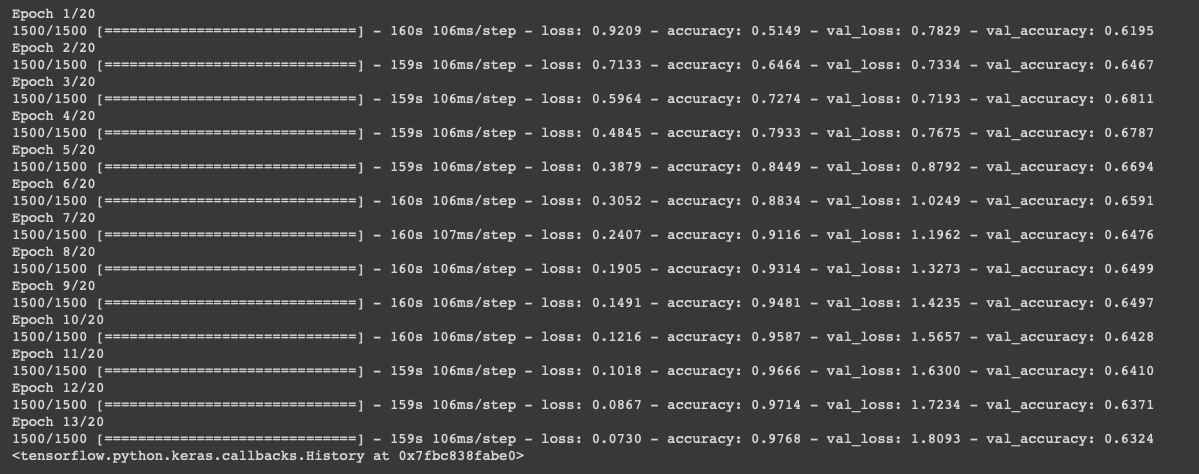

In [50]:
#model.save('multiclass.h5')

mm1 = load_model('../input/weights/multiclass.h5')

In [51]:
pred = mm1.predict_classes(xTest)

import numpy as np
rounded_labels=np.argmax(yTest, axis=1)
rounded_labels

array([2, 0, 2, ..., 1, 2, 0])

**Confusion_Matrix**

In [52]:
confusion_matrix(rounded_labels,pred)

array([[2416, 1065,  479],
       [1481, 2128,  348],
       [ 733,  305, 3045]])

Acuracy Score for Multiclass Classification

In [53]:
accuracy_score(rounded_labels,pred)

0.6324166666666666

# Multilabel Classification 

In [54]:
allTags = data['Tags'].apply(lambda x:x.lower())
allTags = list(allTags.values)
allTags = ''.join(allTags)
count = Counter(allTags.split())
len(count) # unique Tags

10703

In [55]:
count = pd.DataFrame(list(dict(count).items()),columns = ['Technology','Count'])
count.astype({'Count':'int64'})

count.sort_values('Count',axis =0,ascending = False,inplace = True)

Checking Technologies- Tags and their frequency

In [56]:
fig = px.scatter(count, x = 'Technology',y='Count',size='Count',color='Count')

fig.update_layout(title='All Technologie\'s-Tags and their Frequency',xaxis=dict(title='Technology'),yaxis=dict(title='No. of Questions'))

fig.show()

Remove the Tech who have less than 1000 count

In [57]:
count = count[count['Count']>=1000]

In [58]:
fig = px.scatter(count, x = 'Technology',y='Count',size='Count',color='Count')

fig.update_layout(title='Technologie\'s have Frequency greater than 1000',xaxis=dict(title='Technology'),yaxis=dict(title='No. of Questions'))

fig.show()

> We have 23 multilabel which cover most of the questions

> We will save these 23 Multilabel Tags in Variable tech List

In [59]:
tech = list(count['Technology'].values)
len(tech) # we have 23 multilabe which cover most of the questions

23

Checking Tags if they are present in tech list then we will pass list in Tags Column otherwise will pass None

In [60]:
def FinalTags(tags):
  t = list()
  for tag in tags.split():
    if (tag.lower() in tech):
      t.append(tag)
  if(t==[]):
    return None
  else:
    return t
data['Tags'] = data['Tags'].apply(FinalTags)
data.isna().sum()

Id                    0
Title                 0
Body                  0
Tags              13838
CreationDate          0
Y                     0
CleanBody             5
CreationMonth         0
CreationDay           0
CreationYear          0
CreationQuater        0
question              0
dtype: int64

After Checking Tags we now have 13k value as None values 

We will simply drop this for further Classification

In [61]:
data.dropna(inplace= True,axis= 0)
data.isna().sum()

Id                0
Title             0
Body              0
Tags              0
CreationDate      0
Y                 0
CleanBody         0
CreationMonth     0
CreationDay       0
CreationYear      0
CreationQuater    0
question          0
dtype: int64

To Prepare for Multilabel Classification We will use MultiLabelBinarizer for the Target Labels and same step for the Question Text

In [62]:
multi = MultiLabelBinarizer()
y = multi.fit_transform(data['Tags'])

In [63]:
token = Tokenizer(vocab,lower=True,oov_token=oov_tok)
token.fit_on_texts(data['question'])
seq = token.texts_to_sequences(data['question'])
padded = pad_sequences(seq,padding = 'post',truncating='post',maxlen=text_length)

padded.shape

(46157, 100)

In [64]:
xTrain,xTest,yTrain,yTest = train_test_split(padded,y,test_size = 0.2,random_state = 2)

In [65]:
model = Sequential()

model.add(Embedding(vocab,embedding_dim,input_length=xTrain.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(250))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(yTrain.shape[1]))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 500)          10000000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 500)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 250)               751000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 23)               

In [67]:
call = EarlyStopping(monitor='val_loss',verbose=0,patience=6)

#model.fit(xTrain,yTrain,epochs=20,validation_data=(xTest,yTest),callbacks=[call],verbose = 1)

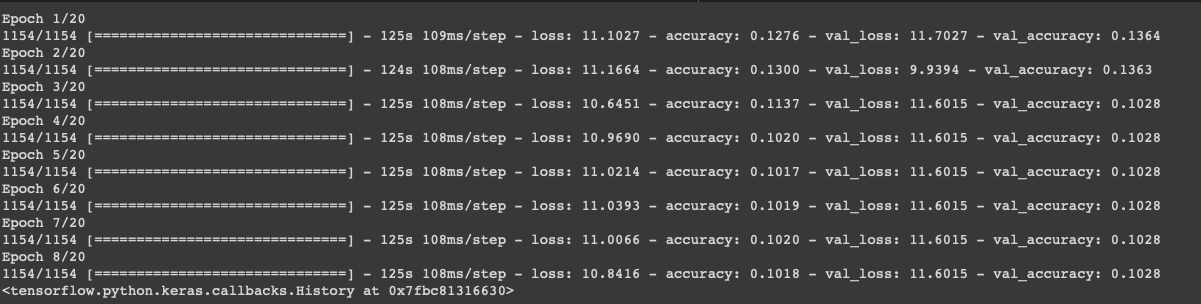

In [68]:
#model.save('Labels.h5')
mm2 = load_model('../input/weights/Labels.h5')

In [69]:
rounded_labels=np.argmax(yTest, axis=1)
pred = mm1.predict_classes(xTest)

In [70]:
confusion_matrix(rounded_labels,pred)

array([[430, 278, 264,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 96, 105,  88,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [153, 131,  82,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [141, 107,  91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [368, 232, 214,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [226, 151, 155,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [161, 129,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [150, 126,  55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

For models weights(h5)and Preprocessed Dataset 

I, First save into output file and later download and upload into input file

because after refreshing kaggle kernel get return to it's previous state so it's remove the output file

If you Guys have any Suggestion/s or any tips to improve classification Model or this kaggle notebook please Comment it will help me to improvise alot

Thank You